

"""
### Question:


#### Image Classification using the Celebrity Faces Dataset

You are tasked with designing an image classification architecture and using it to classify images from the Celebrity Faces Dataset, which consists of images belonging to 17 different celebrity classes. Follow the steps below to complete this task:

1. **Design an Image Classification Architecture**:
    - Create a convolutional neural network (CNN) architecture for image classification. The architecture should include:
        - Input layer suitable for the image size of the Celebrity Faces Dataset (images are generally around 474 pixels in one dimension).
        - Convolutional layers, pooling layers, and fully connected layers. Customize the number, type, and order of layers as you see fit.
        - Use suitable activation functions throughout the network.
        - Implement dropout or any other regularization techniques as needed.

2. **Compile the Model**:
    - Select an appropriate loss function and optimizer for multi-class classification.
    - Compile the model using your chosen parameters.

3. **Prepare and Split the Dataset**:
    - Load and preprocess the Celebrity Faces Dataset. Ensure to handle data augmentation if necessary.
    - Resize each image to a uniform size suitable for your model's input layer (e.g., resize images to 224x224 pixels).
    - Split the dataset into training and validation sets.

4. **Train the Model**:
    - Train the model using the training set of the Celebrity Faces Dataset.
    - Monitor the training process and adjust hyperparameters as needed.
    - Validate the model using the validation set.

5. **Evaluate the Model**:
    - Evaluate the performance of your model on the validation set.
    - Provide metrics such as accuracy, precision, recall, and F1-score.

6. **Classify New Images**:
    - During the exam, you will be provided with new images from the Celebrity Faces Dataset. Use your trained model to classify these images.
    - Report the predicted labels for the new images and discuss any challenges faced.

7. **Documentation and Analysis**:
    - Document your entire process, including:
        - Architecture design decisions.
        - Hyperparameter choices.
        - Training and evaluation procedures.
        - Results and analysis of the model's performance.

#### Notes:
- Utilize Python and a deep learning framework of your choice (e.g., TensorFlow, Keras) for implementing the CNN.
- The images in the Celebrity Faces Dataset should be resized to 224x224 pixels for consistency in input size.
- Ensure your code is well-structured and easy to follow, with clear comments where necessary.



Good luck with your preparation!
"""


Loaded images shape: (1799, 150, 150, 3)
Loaded labels shape: /n Images with Folder name (1799,) /n Images with Folder name


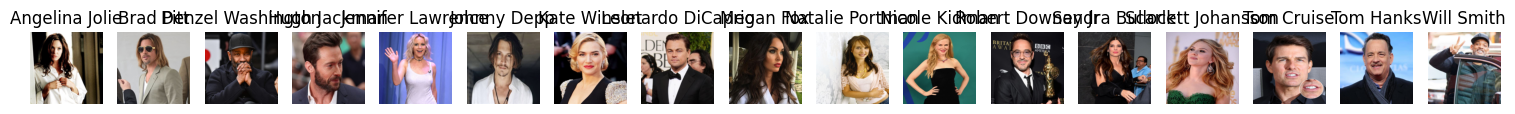

In [1]:
#Code for Loading the image
# Code for loading the dataset and plotting, with folder name

# first upload the dataset in google drive
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Set up the directory path where your dataset is located
dataset_directory = '/kaggle/input/test-8-0/Test 8.0/Practical Question/Celebrity Faces Dataset'

# Function to load the dataset
def load_dataset(directory):
    images = []
    labels = []
    class_names = sorted(os.listdir(directory))  # Assumes each subdirectory is a class

    for i, class_name in enumerate(class_names):
        class_directory = os.path.join(directory, class_name)
        for filename in os.listdir(class_directory):
            if filename.endswith('.jpg') or filename.endswith('.png'):
                image_path = os.path.join(class_directory, filename)
                image = Image.open(image_path)
                image = image.resize((150, 150))  # Resize if necessary
                image = np.array(image) / 255.0  # Normalize pixel values to [0, 1]
                images.append(image)
                labels.append(i)  # Store index of the class

    images = np.array(images)
    labels = np.array(labels)

    return images, labels, class_names

# Usage example
images, labels, class_names = load_dataset(dataset_directory)

# Print shape of loaded data for verification
print("Loaded images shape:", images.shape)
print("Loaded labels shape: /n Images with Folder name", labels.shape, "/n Images with Folder name")

# Plotting example: Plot one example image from each class
num_classes = len(class_names)
fig, axes = plt.subplots(1, num_classes, figsize=(15, 3))

for i, class_name in enumerate(class_names):
    class_indices = np.where(labels == i)[0]
    example_image = images[class_indices[0]]
    axes[i].imshow(example_image)
    axes[i].set_title(class_name)
    axes[i].axis('off')

plt.tight_layout()
plt.show()


In [2]:
#Sample code for solving
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt

2024-07-05 15:35:34.663433: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-05 15:35:34.663587: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-05 15:35:34.850829: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
# Function to create the CNN architecture
def create_model(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

# Hyperparameters
learning_rate = 0.001
batch_size = 32
epochs = 20

In [5]:
TRAINING_DIR = "/tmp/celeb/training/"
TESTING_DIR = "/tmp/celeb/testing/"

In [22]:
import os
import random
from shutil import copy2
import tempfile


def split_data(base_dir, test_size=0.2, seed=None):

  # Create temporary directories for training and testing data
  train_dir = TRAINING_DIR
  test_dir = TESTING_DIR
  os.makedirs(train_dir, exist_ok=True)
  os.makedirs(test_dir, exist_ok=True)

  # Set random seed for reproducibility (if provided)
  if seed is not None:
    random.seed(seed)

  # Iterate through class folders
  for class_dir in os.listdir(base_dir):
    if os.path.isdir(os.path.join(base_dir, class_dir)):
      class_path = os.path.join(base_dir, class_dir)
      images = os.listdir(class_path)

      # Randomly shuffle the images for balanced split
      random.shuffle(images)

      # Split into training and testing sets
      split_index = int(len(images) * test_size)
      training_images, testing_images = images[:split_index], images[split_index:]

      # Create class directories in training and testing folders
      os.makedirs(os.path.join(train_dir, class_dir), exist_ok=True)
      os.makedirs(os.path.join(test_dir, class_dir), exist_ok=True)

      # Copy images to respective directories with error handling
      for image in training_images:
        image_path = os.path.join(class_path, image)
        if os.path.isfile(image_path):  # Check if image exists before copying
          copy2(image_path, os.path.join(train_dir, class_dir))
        else:
          print(f"Warning: Image '{image}' not found in '{class_path}'")
      for image in testing_images:
        image_path = os.path.join(class_path, image)
        if os.path.isfile(image_path):
          copy2(image_path, os.path.join(test_dir, class_dir))
        else:
          print(f"Warning: Image '{image}' not found in '{class_path}'")

  return train_dir, test_dir

In [34]:
base_dir =  "/kaggle/input/test-8-0/Test 8.0/Practical Question/Celebrity Faces Dataset"
train_dir, test_dir = split_data(base_dir, test_size=0.2, seed=42)
print(f"Training data directory: {train_dir}")
print(f"Testing data directory: {test_dir}")

Training data directory: /tmp/celeb/training/
Testing data directory: /tmp/celeb/testing/


In [35]:
len(os.listdir(train_dir))

17

In [57]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def train_val_generators(TRAINING_DIR, VALIDATION_DIR, num_classes):
    train_datagen = ImageDataGenerator(rescale=1./255.,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest')  

    train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=32,
                                                      class_mode='categorical',  
                                                      target_size=(150, 150),
                                                      classes=classes) 

    val_datagen = ImageDataGenerator(rescale=1./255.)
    val_generator = val_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                  batch_size=10,
                                                  class_mode='categorical',  
                                                  target_size=(150, 150),
                                                  classes=classes)  

    return train_generator, val_generator


In [58]:
len(os.listdir(train_dir))
classes = os.listdir(TRAINING_DIR)
classes

['Angelina Jolie',
 'Sandra Bullock',
 'Leonardo DiCaprio',
 'Will Smith',
 'Tom Hanks',
 'Denzel Washington',
 'Robert Downey Jr',
 'Scarlett Johansson',
 'Natalie Portman',
 'Jennifer Lawrence',
 'Brad Pitt',
 'Megan Fox',
 'Kate Winslet',
 'Hugh Jackman',
 'Tom Cruise',
 'Nicole Kidman',
 'Johnny Depp']

In [59]:
train_generator, validation_generator = train_val_generators(train_dir, test_dir, 17)


Found 1752 images belonging to 17 classes.
Found 1562 images belonging to 17 classes.


In [60]:
# Example input shape (to be adjusted based on dataset)
input_shape = train_images.shape[1:]
num_classes = len(set(train_labels.flatten()))

In [69]:
def create_model():
  model = tf.keras.models.Sequential([ 
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(17, activation='sigmoid')
  ])

  
  model.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
                metrics=['accuracy']) 
  return model

In [70]:
model = create_model()


In [71]:
# Train the model
history = model.fit(train_generator,
                    batch_size=32,
                    epochs=10,
                    validation_data=validation_generator)



Epoch 1/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 36s 578ms/step - accuracy: 0.0987 - loss: 2.8335 - val_accuracy: 0.1095 - val_loss: 2.8157
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 33s 565ms/step - accuracy: 0.1279 - loss: 2.8080 - val_accuracy: 0.1095 - val_loss: 2.8188
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 32s 555ms/step - accuracy: 0.1130 - loss: 2.8141 - val_accuracy: 0.1095 - val_loss: 2.7899
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 33s 561ms/step - accuracy: 0.0994 - loss: 2.8101 - val_accuracy: 0.1223 - val_loss: 2.7490
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 33s 559ms/step - accuracy: 0.1293 - loss: 2.7452 - val_accuracy: 0.1434 - val_loss: 2.6785
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 33s 567ms/step - accuracy: 0.1233 - loss: 2.7201 - val_accuracy: 0.1485 - val_loss: 2.6125
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 33s 570ms/step - accuracy: 0.1520 - loss: 2.6588 - val_accuracy: 0.1063 - val_loss: 2.6773
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 33s 560ms/step - accuracy: 0.1425 - loss: 2.6397 - val_accu

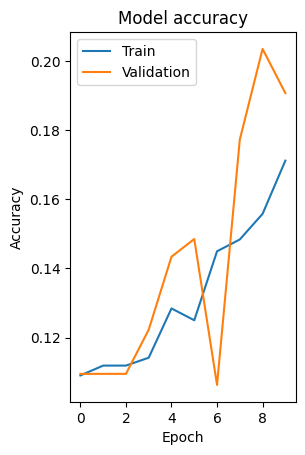

In [72]:
# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

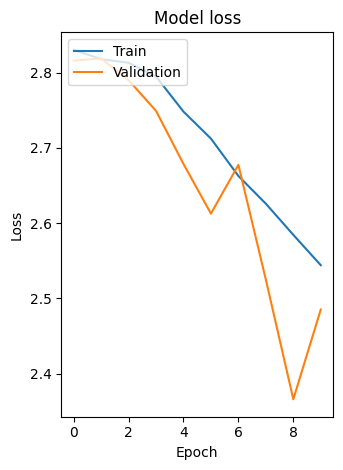

In [73]:
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

**You can utilize any code, including our existing code, to enhance your project.**

**All the best**

What is Mean Average Precision (mAP) in the context of object detection?

Answer: Mean Average Precision (mAP) is a metric used to measure the overall performance of object detection algorithms. It considers both precision (how many correct detections) and recall (how many actual objects were detected) across all classes in a dataset. A higher mAP indicates a more accurate object detection model.

Explain the main differences between RCNN, Fast RCNN, and Faster RCNN.
Answer:

RCNN: The original architecture, it's slow due to proposing regions multiple times for each image location.
Fast RCNN: Improves speed by sharing convolutional features across all regions, reducing redundant computations.
Faster RCNN: Introduces a Region Proposal Network (RPN) to efficiently propose candidate object regions, further improving speed compared to Fast RCNN.

How does the Region Proposal Network (RPN) in Faster RCNN improve the efficiency of the detection process?

Answer: The RPN in Faster RCNN acts as a pre-filter, proposing candidate regions likely to contain objects. This allows the model to focus its detection efforts on these areas instead of analyzing the entire image, significantly improving efficiency.

Describe the architecture and working principle of the YOLO (You Only Look Once) object detection algorithm.

Answer: YOLO is a single-stage detector. Unlike RCNN-based methods, it doesn't have separate stages for region proposal and classification. Instead, it treats object detection as a single prediction problem. It divides the image into a grid and predicts bounding boxes and class probabilities for each grid cell.

What are the key improvements introduced in YOLOv2 (YOLO9000) compared to the original YOLO algorithm?

Answer: YOLOv2 addresses limitations of YOLO, particularly with small objects. It incorporates batch normalization (a training technique) and uses finer-grained feature maps to improve detection for smaller objects.

How does YOLOv3 differ from its predecessors, and what are its main advantages?

Answer: YOLOv3 builds upon YOLOv2 by using better object detection backbones (like Darknet-53) and introducing new feature scales to handle a wider range of object sizes. It also utilizes logistic regression for the final detection step, leading to improved accuracy.

Discuss the role of anchor boxes in YOLO and Faster RCNN. How do they contribute to the detection process?

Answer: Both YOLO and Faster RCNN utilize anchor boxes. These are predefined boxes of various sizes and aspect ratios placed on an image. The models predict adjustments (offsets) to these anchors to fit the actual objects present. Anchor boxes act as a set of templates that the models use to localize and classify objects.

What is the Intersection over Union (IoU) metric, and why is it important in object detection?

Answer: Intersection over Union (IoU) measures the overlap between a predicted bounding box and the ground truth box (the actual location of the object). A higher IoU indicates a more accurate prediction. It's a crucial metric for evaluating the effectiveness of object detection algorithms.

Explain the concept of non-maximum suppression (NMS) and its significance in object detection pipelines.

Answer: Non-maximum suppression (NMS) helps remove redundant bounding boxes for the same object. It keeps the box with the highest confidence score and eliminates highly overlapping boxes with lower scores. NMS ensures that each object has only one bounding box prediction in the final output.

In the context of object detection, what are the advantages and disadvantages of using single-stage detectors like YOLO compared to two-stage detectors like Faster RCNN?
Answer:

Single-stage (YOLO):
Advantages: Faster, simpler architecture, well-suited for real-time applications.
Disadvantages: May be less accurate for complex scenes with many objects.
Two-stage (Faster RCNN):
Advantages: More accurate, better for complex scenes.
Disadvantages: Slower due to multiple processing steps.